In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [190]:
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = 200000

In [191]:
DF = pd.read_excel('data/data8.xls')

In [192]:
# Percent of rented properties
DF['pctrnths'] = DF['rnthsg'] / DF['tothsg'] * 100

# Logarithm of percent of rented properties
DF['lpctrnths'] = np.log(DF['pctrnths'])

# Squared average income
DF['avgincsq'] = DF['avginc'] **2

In [193]:
DF80 = DF[DF['year'] == 80]
DF90 = DF[DF['year'] == 90]

In [194]:
# Calculate the diff for logarithm of change in percent of rented properties (lpctrnths)
pivot_df = DF.pivot(index='city', columns='year', values='lpctrnths')
pivot_df['clpctrnths'] = pivot_df[90] - pivot_df[80]
result_df = pivot_df.reset_index()

# Add new column 'clpctrnths' to DF90
DF90 = DF90.join(pivot_df, how='inner')

In [195]:
DF

,city,year,pop,enroll,rent,rnthsg,tothsg,avginc,lenroll,lpop,...,clrent,cltothsg,clrnthsg,clavginc,pctstu,cpctstu,y90,pctrnths,lpctrnths,avgincsq
0,1,80,75211,15303,197,13475,26167,11537,9.635804,11.22805,...,.,.,.,.,20.346760,.,0,51.496159,3.941507,133102369
1,1,90,77759,18017,342,15660,29467,19568,9.799071,11.26137,...,0.551607,0.118772,0.150273,0.528336,23.170310,2.823551,1,53.144195,3.973009,382906624
2,2,80,106743,22462,323,14580,37277,19841,10.019580,11.57818,...,.,.,.,.,21.043070,.,0,39.112590,3.666444,393665281
3,2,90,141865,29769,496,26895,55540,31885,10.301220,11.86263,...,0.428924,0.398727,0.612289,0.474385,20.984030,-0.059032,1,48.424559,3.880007,1016653225
4,3,80,36608,11847,216,7026,13482,11455,9.379830,10.50802,...,.,.,.,.,32.361780,.,0,52.113930,3.953432,131217025
5,3,90,42099,10265,351,9557,16894,21202,9.236495,10.64778,...,0.485508,0.225603,0.307656,0.615669,24.383000,-7.978777,1,56.570380,4.035486,449524804
6,4,80,36640,13825,267,7896,14041,14682,9.534234,10.50890,...,.,.,.,.,37.731990,.,0,56.235311,4.029545,215561124
7,4,90,46209,18173,588,10617,17926,29044,9.807693,10.74093,...,0.789478,0.24427,0.296101,0.68219,39.327840,1.595848,1,59.226821,4.081375,843553936
8,5,80,62134,8175,475,5796,21337,31300,9.008836,11.03705,...,.,.,.,.,13.157050,.,0,27.164081,3.301896,979690000
9,5,90,110330,18205,925,15112,40257,56307,9.809451,11.61123,...,0.666479,0.634841,0.958321,0.5872,16.500500,3.343451,1,37.538813,3.625375,3170478249


In [196]:
y = DF['rent'].values
x = DF['avginc'].values

In [197]:
# Simple linear regression with average income as only regressor
X80 = DF80['avginc']
y80 = DF80['rent']
model80 = sm.OLS(y80, sm.add_constant(X80)).fit()

print("##### Linear regression for 1980 #######")
print(model80.summary())

X90 = DF90['avginc']
y90 = DF90['rent']
model90 = sm.OLS(y90, sm.add_constant(X90)).fit()

print()
print("##### Linear regression for 1990 #######")
print(model90.summary())

##### Linear regression for 1980 #######
                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           3.18e-16
Time:                        17:51:22   Log-Likelihood:                -296.49
No. Observations:                  64   AIC:                             597.0
Df Residuals:                      62   BIC:                             601.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

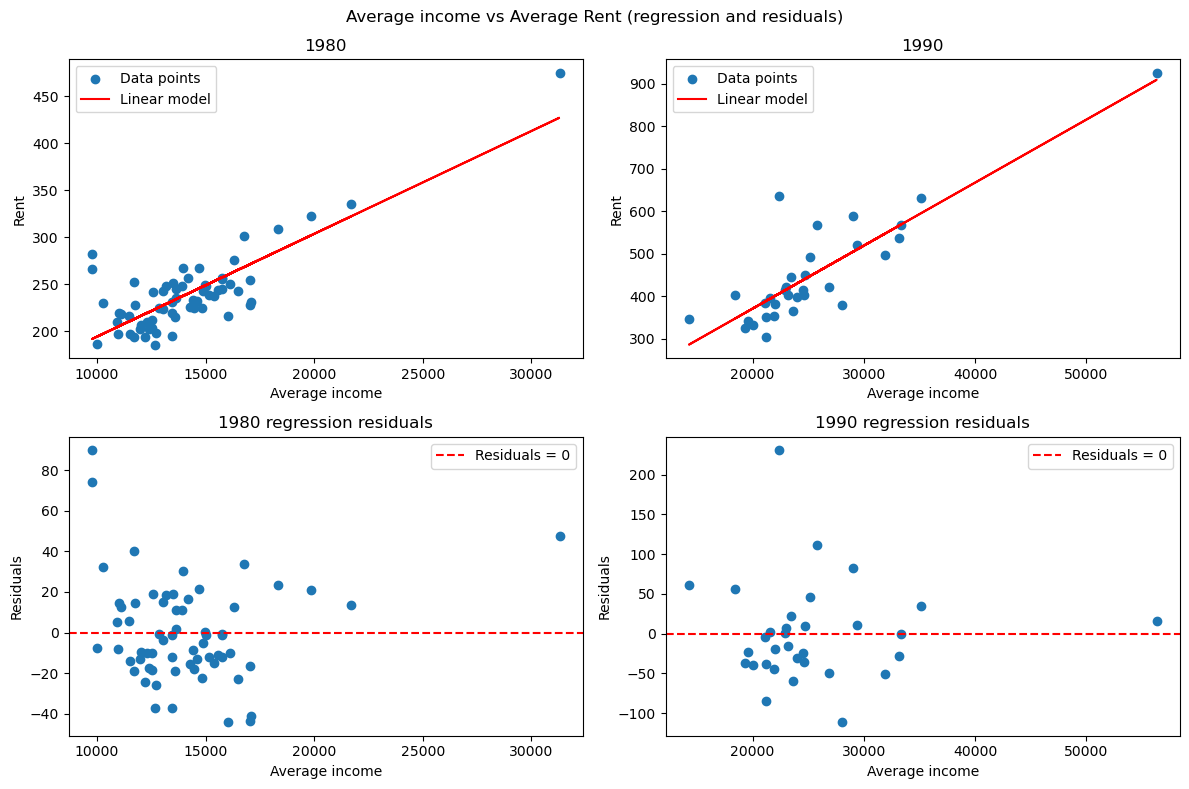

In [198]:
# Plot linear regression and its residuals
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.scatter(X80, y80, label='Data points')
ax1.plot(X80, model80.params.const + model80.params.avginc * X80, label='Linear model', color='red')

ax2.scatter(X90, y90, label='Data points')
ax2.plot(X90, model90.params.const + model90.params.avginc * X90, label='Linear model', color='red')

ax3.scatter(X80, model80.resid)
ax3.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')

ax4.scatter(X90, model90.resid)
ax4.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')

ax1.set_title('1980')
ax1.set_xlabel("Average income")
ax1.set_ylabel("Rent")
ax1.legend()

ax2.set_title('1990')
ax2.set_xlabel("Average income")
ax2.set_ylabel("Rent")
ax2.legend()

ax3.set_title('1980 regression residuals')
ax3.set_xlabel("Average income")
ax3.set_ylabel("Residuals")
ax3.legend()

ax4.set_title('1990 regression residuals')
ax4.set_xlabel("Average income")
ax4.set_ylabel("Residuals")
ax4.legend()

plt.suptitle('Average income vs Average Rent (regression and residuals)')
plt.tight_layout()
plt.show()

In [242]:
# Adding more parameters to linear regression to improve the fit of the model (1980)
X80 = DF80[['pop', 'pctstu', 'pctrnths', 'avginc']]
y80 = DF80['rent']

model80ex = sm.OLS(y80, X80).fit()
y80pred = X80 @ model80ex.params.values

print(model80ex.summary())

# Adding more parameters to linear regression to improve the fit of the model (1990)
X90 = DF90[['pop', 'pctstu', 'pctrnths', 'avginc']]
y90 = DF90['rent']

model90ex = sm.OLS(y90, X90).fit()
y90pred = X90 @ model90ex.params.values

print(model90ex.summary())

                                 OLS Regression Results                                
Dep. Variable:                   rent   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2340.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                    4.10e-65
Time:                        13:51:57   Log-Likelihood:                         -280.69
No. Observations:                  64   AIC:                                      569.4
Df Residuals:                      60   BIC:                                      578.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

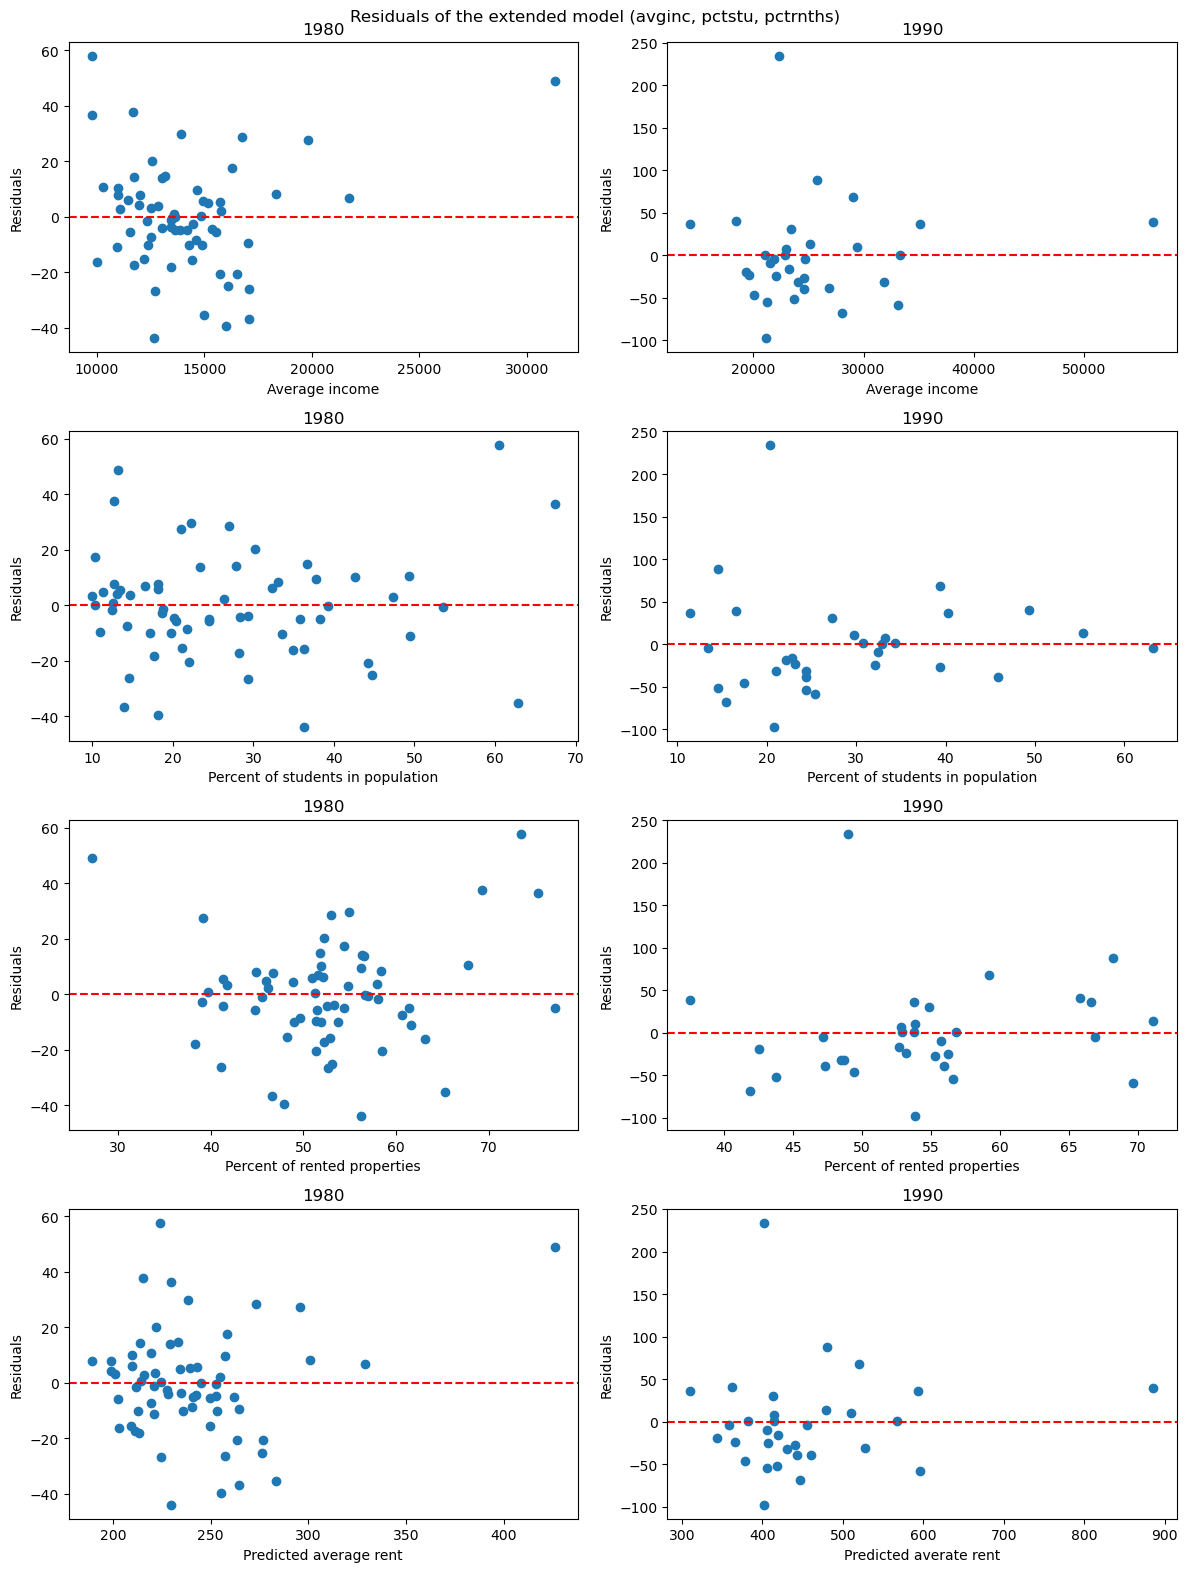

In [243]:
def populate_subplot(ax, x, resid, title, xlabel):
    ax.scatter(x, resid)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Residuals")

# Plot residuals in relation to different params and to predicted values
_, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 16))

populate_subplot(ax1, X80[['avginc']], model80ex.resid, '1980', xlabel="Average income")
populate_subplot(ax2, X90[['avginc']], model90ex.resid, '1990', xlabel="Average income")
populate_subplot(ax3, X80[['pctstu']], model80ex.resid, '1980', xlabel="Percent of students in population")
populate_subplot(ax4, X90[['pctstu']], model90ex.resid, '1990', xlabel="Percent of students in population")
populate_subplot(ax5, X80[['pctrnths']], model80ex.resid, '1980', xlabel="Percent of rented properties")
populate_subplot(ax6, X90[['pctrnths']], model90ex.resid, '1990', xlabel="Percent of rented properties")
populate_subplot(ax7, y80pred, model80ex.resid, '1980', xlabel="Predicted average rent")
populate_subplot(ax8, y90pred, model90ex.resid, '1990', xlabel="Predicted averate rent")

plt.suptitle('Residuals of the extended model (avginc, pctstu, pctrnths)')
plt.tight_layout()
plt.show()

In [244]:
# Linear regression for change parameters
X_change = DF90[['clavginc', 'clpop', 'cpctstu', 'clpctrnths']]
y_change = DF90['clrent']

model_change = sm.OLS(y_change.astype(float), X_change.astype(float)).fit()
y_change_pred = X_change@model_change.params.values

print(model_change.summary())

                                 OLS Regression Results                                
Dep. Variable:                 clrent   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              137.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                    5.80e-18
Time:                        13:52:09   Log-Likelihood:                          19.985
No. Observations:                  32   AIC:                                     -31.97
Df Residuals:                      28   BIC:                                     -26.11
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

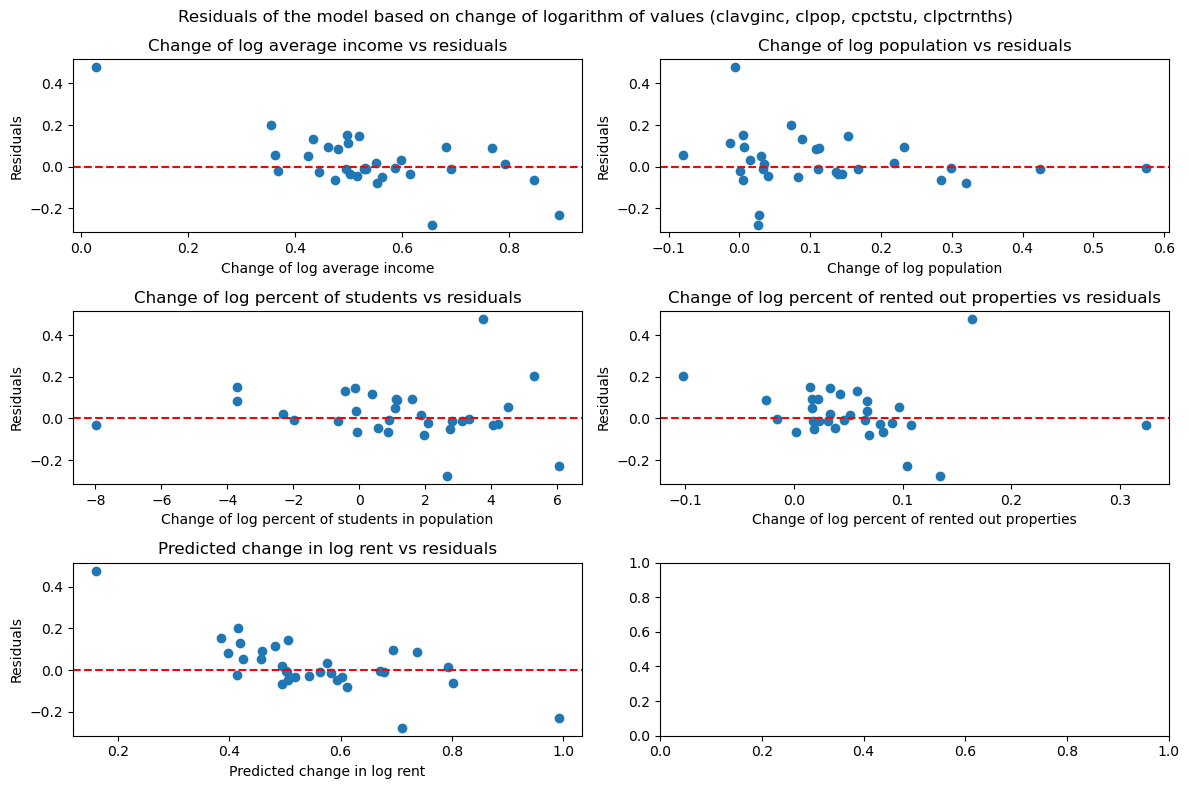

In [245]:
# Plot residuals in relation to different params and to predicted values
_, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 8))

populate_subplot(ax1, X_change[['clavginc']], model_change.resid, 'Change of log average income vs residuals', xlabel="Change of log average income")
populate_subplot(ax2, X_change[['clpop']], model_change.resid, 'Change of log population vs residuals', xlabel="Change of log population")
populate_subplot(ax3, X_change[['cpctstu']], model_change.resid, 'Change of log percent of students vs residuals', xlabel="Change of log percent of students in population")
populate_subplot(ax4, X_change[['clpctrnths']], model_change.resid, 'Change of log percent of rented out properties vs residuals', xlabel="Change of log percent of rented out properties")
populate_subplot(ax5, y_change_pred, model_change.resid, 'Predicted change in log rent vs residuals', xlabel="Predicted change in log rent")

plt.suptitle('Residuals of the model based on change of logarithm of values (clavginc, clpop, cpctstu, clpctrnths)')
plt.tight_layout()
plt.show()

In [246]:
# Define the hypothesis
# H0: coef(pop) - 10 * coef(pctstu) = 0
# HA: coef(pop) - 10 * coef(pctstu) != 0
hypothesis = 'pop = 10 * pctstu'

# Perform the Wald Test (linear hypothesis test)
test_result = model80ex.t_test(hypothesis)

# Display the results of the hypothesis test
print(test_result.summary())

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -5.5245      2.516     -2.196      0.032     -10.558      -0.491


## Testing whether population has 10 times more important that percent of students in the population
For the extended linear model that includes params: 'pop', 'pctstu', 'pctrnths', 'avginc'.

$H_0: \beta_1 - \beta_2 \cdot 10 = 0$ vs $H_1: \beta_1 - \beta_2 \cdot 10 \neq 0$
We can use single linear restriction test
$t_n = \frac{w'\hat\beta - r}{\sqrt{s^2 w'(X'X)^{-1}w}}\sim t_{(n-k)}$
where $w' = [1, -10, 0, 0]$ and $r' = [0, 0, 0, 0]$.
$s^2 = \frac{e'e}{n-k}$
With $n = 64$ and $k = 4$ we will use $t_{(60)} = 2.00$ as critical values for two-sided test with $\alpha = 0.05$.

In [281]:
def t_test(model, X, r):
    beta = model.params.values
    w = np.array(r).T
    e = model.resid
    n = len(X)
    k = len(beta)
    s2 = (e.T@e)/(n-k)
    XX = np.linalg.inv(X.T@X)
    numerator = w.T@beta
    denominator = np.sqrt(s2 * (w.T@XX@w))
    return numerator / denominator

r = [1, -10, 0, 0]
print("T-test value for testing linear restriction for 1980:", t_test(model80ex, X80, r))
print("T-test value for testing linear restriction for 1990:", t_test(model90ex, X90, r))

T-test value for testing linear restriction for 1980: -2.195602452045857
T-test value for testing linear restriction for 1990: 0.41159055435136


In [283]:
# Same T-test using statsmodels.model.t_test function. Results are matching our results.
test_result = model80ex.t_test('pop = 10 * pctstu')
print("1980")
print(test_result.summary())

test_result = model90ex.t_test('pop = 10 * pctstu')
print()
print("1990")
print(test_result.summary())

1980
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -5.5245      2.516     -2.196      0.032     -10.558      -0.491

1990
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.3148     12.913      0.412      0.684     -21.136      31.766
